In [1]:
# import the usual
#import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
import numpy as np

from scipy.sparse import csr_matrix

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
#Music Data Loading
df = pd.read_csv(r"F:\Data_Repository\lastfm\userid-timestamp-artid-artname-traid-traname.tsv", sep="\t", error_bad_lines=False, header = None)


b'Skipping line 2120260: expected 6 fields, saw 8\n'
b'Skipping line 2446318: expected 6 fields, saw 8\n'
b'Skipping line 11141081: expected 6 fields, saw 8\n'
b'Skipping line 11152099: expected 6 fields, saw 12\nSkipping line 11152402: expected 6 fields, saw 8\n'
b'Skipping line 11882087: expected 6 fields, saw 8\n'
b'Skipping line 12902539: expected 6 fields, saw 8\nSkipping line 12935044: expected 6 fields, saw 8\n'
b'Skipping line 17589539: expected 6 fields, saw 8\n'


In [3]:
# dfsmall = pd.read_csv(r"F:\Data_Repository\lastfm\usersha1-profile.tsv",sep='\t',names=['userId','gender','age','country','signupDate'])
# data = pd.read_csv(r"F:\Data_Repository\lastfm\usersha1-artmbid-artname-plays.tsv",sep='\t',names=['userId','artistId','artist','plays'])

In [4]:
df.columns = ['userid', 'timestamp', 'artistid', 'artist', '1', 'song']

In [5]:
df.head(5)

,userid,timestamp,artistid,artist,1,song
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


In [6]:
#data.head()

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
# df.drop(['timestamp','artistid','artist','1'], axis=1, inplace=True)

In [9]:
df.head()

,userid,timestamp,artistid,artist,1,song
0,user_000001,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


Reading other datafiles

In [10]:
# dfsmall.head()

In [11]:
# data.head()

### Creation of timeslots

In [12]:
import datetime

In [13]:
%%time
# extracting time from timestamp
df['time'] = [datetime.datetime.time(d) for d in df['timestamp']] 

Wall time: 1min 2s


In [14]:
df.head()

,userid,timestamp,artistid,artist,1,song,time
0,user_000001,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,23:08:57
1,user_000001,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),13:54:10
2,user_000001,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),13:52:04
3,user_000001,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),13:42:52
4,user_000001,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),13:42:11


In [15]:
df['hour'] = df['timestamp'].dt.hour

In [16]:
df.head()

,userid,timestamp,artistid,artist,1,song,time,hour
0,user_000001,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,23:08:57,23
1,user_000001,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),13:54:10,13
2,user_000001,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),13:52:04,13
3,user_000001,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),13:42:52,13
4,user_000001,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),13:42:11,13


In [17]:
df.drop(['time','1'], axis=1, inplace=True)

In [18]:
df.head()

,userid,timestamp,artistid,artist,song,hour
0,user_000001,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,23
1,user_000001,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Composition 0919 (Live_2009_4_15),13
2,user_000001,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc2 (Live_2009_4_15),13
3,user_000001,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Hibari (Live_2009_4_15),13
4,user_000001,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc1 (Live_2009_4_15),13


#### Now to get slots. 24 / 4 = 6 hrs per slot
slot1: 0-5 | 
slot2: 6-11 | 
slot3: 12-17 | 
slot4: 18-23

In [19]:
#function to return slot number
def slot(hour):
    if 0 <= hour and hour <= 5:
        return 1
    elif 6 <= hour and hour <= 11:
        return 2
    elif 12 <= hour and hour <= 17:
        return 3
    else:
        return 4

In [20]:
%%time
df['slot'] = df['hour'].apply( lambda x : slot(x) ) 

Wall time: 7.62 s


In [21]:
df.head()

,userid,timestamp,artistid,artist,song,hour,slot
0,user_000001,2009-05-04 23:08:57,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,23,4
1,user_000001,2009-05-04 13:54:10,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Composition 0919 (Live_2009_4_15),13,3
2,user_000001,2009-05-04 13:52:04,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc2 (Live_2009_4_15),13,3
3,user_000001,2009-05-04 13:42:52,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Hibari (Live_2009_4_15),13,3
4,user_000001,2009-05-04 13:42:11,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc1 (Live_2009_4_15),13,3


### Removing artist name and song id (possibly) from the user_songs_df dataframe

In [22]:
user_songs_df = df[['userid','artistid','artist','song','slot'] ].copy()

In [23]:
# user_songs_df.columns = ['userid', 'artistid', 'songid', 'song', 'time']

In [24]:
# user_songs_df = user_songs_df.drop(['songid'], axis=1, inplace=False)

In [25]:
user_songs_df.head()

,userid,artistid,artist,song,slot
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,4
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Composition 0919 (Live_2009_4_15),3
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc2 (Live_2009_4_15),3
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Hibari (Live_2009_4_15),3
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc1 (Live_2009_4_15),3


In [26]:
# user_songs_df['song'].nunique()

In [27]:
len(df) 

19098853

In [28]:
len(user_songs_df)

19098853

In [29]:
# user_songs_df[user_songs_df['userid'] == 'user_000001']['song'].value_counts()[:10].plot()

In [30]:
# user_songs_df['userid'].nunique()

In [31]:
# user_songs_df['song'].nunique()

In [32]:
#user_songs_df['userid'].value_counts().sort_index()

Wall time: 2.25 s


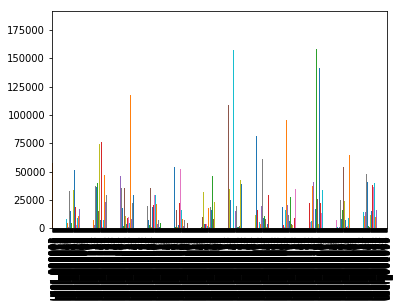

In [33]:
%%time
user_songs_df['userid'].value_counts().sort_index()[:].plot(kind='bar')

In [34]:
len(user_songs_df) 

19098853

In [35]:
%%time
#df_user_songs_grp = user_songs_df.groupby(["userid","song"]) 

Wall time: 0 ns


In [36]:
#df_user_songs_grp.first()

In [37]:
#df_user_songs_grp['artistid']

In [38]:
# filter_morethan10 = df_user_songs_grp['artistid'].filter(lambda x: len(x) >= 10)

In [39]:
# %%time
# user_song_df_count = user_songs_df.groupby(["userid","song"])

In [40]:
# user_song_df_count.head(5)

In [41]:
## Memory error
# user_song_df_count = user_songs_df.groupby(["userid","song"])['song'].count().unstack()

In [42]:
%%time
user_song_df_count = user_songs_df.groupby(["userid","song"]).size().reset_index(name="count").copy()

Wall time: 8.65 s


In [43]:
len(user_song_df_count)

4407910

In [44]:
type(user_song_df_count)

pandas.core.frame.DataFrame

In [45]:
# user_song_df_count['artistid'] = user_songs_df['artistid']
# user_song_df_count['artist'] = user_songs_df['artist']
# user_song_df_count['slot'] = user_songs_df['slot']
# wrong way to merge

In [46]:
user_songs_df.dtypes

userid      object
artistid    object
artist      object
song        object
slot         int64
dtype: object

In [47]:
user_song_df_count.dtypes

userid    object
song      object
count      int64
dtype: object

In [48]:
user_songs_df['userid'] = user_songs_df['userid'].astype(str)
user_song_df_count['userid'] = user_song_df_count['userid'].astype(str)

user_songs_df['song'] = user_songs_df['song'].astype(str)
user_song_df_count['song'] = user_song_df_count['song'].astype(str)

In [49]:
user_songs_df.dtypes

userid      object
artistid    object
artist      object
song        object
slot         int64
dtype: object

In [50]:
user_song_df_count.dtypes

userid    object
song      object
count      int64
dtype: object

In [51]:
# user_song_df_count = pd.merge(user_song_df_count, user_songs_df, how = 'left',on = ['userid','song'] )

In [52]:
# user_song_df_count[:200].merge(user_songs_df[:200], how = 'left',on = ['userid','song'] )

In [53]:
user_song_df_count.head(5)

,userid,song,count
0,user_000001,'84 Pontiac Dream,14
1,user_000001,(All I Wanted Was To Make You) Feel Good,3
2,user_000001,(D)Ecaying Beauty,1
3,user_000001,(Far From) Home,1
4,user_000001,(Get Off Your) High Horse Lady,1


In [54]:
len(user_song_df_count)

4407910

#### Get total no. of times a any song was played for each user

In [55]:
total_plays_per_user = pd.DataFrame(user_songs_df['userid'].value_counts().sort_index()[:])

In [56]:
type(total_plays_per_user)

pandas.core.frame.DataFrame

In [57]:
total_plays_per_user = total_plays_per_user.rename(columns = {'userid': 'times_played' } )

In [58]:
total_plays_per_user = total_plays_per_user.reset_index()

In [59]:
total_plays_per_user = total_plays_per_user.rename(columns = {'index': 'userid' } )

In [60]:
total_plays_per_user.head()

,userid,times_played
0,user_000001,16685
1,user_000002,57438
2,user_000003,19494
3,user_000004,18411
4,user_000005,20341


In [61]:
user_songs_df.head()

,userid,artistid,artist,song,slot
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,4
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Composition 0919 (Live_2009_4_15),3
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc2 (Live_2009_4_15),3
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Hibari (Live_2009_4_15),3
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc1 (Live_2009_4_15),3


In [62]:
user_songs_df = user_songs_df.merge(total_plays_per_user, how = 'left',on = ['userid'] )

In [63]:
len(user_songs_df)

19098853

In [64]:
user_songs_df.head()

,userid,artistid,artist,song,slot,times_played
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,4,16685
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Composition 0919 (Live_2009_4_15),3,16685
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc2 (Live_2009_4_15),3,16685
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Hibari (Live_2009_4_15),3,16685
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,Mc1 (Live_2009_4_15),3,16685


### user_songs_df is the dataframe containing times_played per user

Now we split the dataset to get 80 train and 20% test. need to make sure 20% test has almost ~80% of no. of times songs played.

In [67]:
user_songs_df[user_songs_df['userid']== 'user_000821']

,userid,artistid,artist,song,slot,times_played
15873768,user_000821,8c437ee8-8ddb-4254-a916-a0f0355fdd80,Micky Green,Baby,3,5699
15873769,user_000821,7276a2f0-2487-4b4b-be78-2346758ab354,The Dots,The Dots - 04 - Been A Time,3,5699
15873770,user_000821,7276a2f0-2487-4b4b-be78-2346758ab354,The Dots,The Dots - 01 - It Doesnt Matter,3,5699
15873771,user_000821,8c437ee8-8ddb-4254-a916-a0f0355fdd80,Micky Green,Outro,3,5699
15873772,user_000821,8c437ee8-8ddb-4254-a916-a0f0355fdd80,Micky Green,Outro,3,5699
15873773,user_000821,NaN,3:20,Time,3,5699
15873774,user_000821,NaN,2:44,Superman,3,5699
15873775,user_000821,2f548675-008d-4332-876c-108b0c7ab9c5,Sia,Numb,3,5699
15873776,user_000821,5bc00e04-97da-47c5-9588-7cc9b39a6d54,Cirkus,Fools,3,5699
15873777,user_000821,5bc00e04-97da-47c5-9588-7cc9b39a6d54,Cirkus,Fools,2,5699


In [74]:
len(user_songs_df[user_songs_df['userid']< 'user_000795']) / len(user_songs_df) * 100

80.07674597003286

In [78]:
train_df = user_songs_df[user_songs_df['userid']< 'user_000795']
len(train_df) / len(user_songs_df) * 100

80.07674597003286

In [79]:
test_df = user_songs_df[user_songs_df['userid']>= 'user_000795']
len(test_df) / len(user_songs_df) * 100

19.92325402996714

Current dataframe has unique user-song combinations.

In [50]:
###convert data into a csr matrix - sparse matrix representation

In [51]:
user_song_df_count = user_song_df_count.dropna() 

Nothing is dropped

In [52]:
len ( user_song_df_count)

4407910

In [53]:
# user_song_df_count.nunique()

In [54]:
%%time
# Convert userid and song names into numerical IDs
user_song_df_count['user_id'] = user_song_df_count['userid'].astype("category").cat.codes
user_song_df_count['song_id_new'] = user_song_df_count['song'].astype("category").cat.codes

# Create a lookup frame so we can get the artist names back in 
# readable form later.
item_lookup = user_song_df_count[['song_id_new', 'song']].drop_duplicates()
item_lookup['song_id_new'] = item_lookup.song_id_new.astype(str)

Wall time: 5.59 s


In [119]:
user_song_df_count.head()

,userid,song,count,user_id,song_id_new
0,user_000001,'84 Pontiac Dream,14,0,708
1,user_000001,(All I Wanted Was To Make You) Feel Good,3,0,1456
2,user_000001,(D)Ecaying Beauty,1,0,1776
3,user_000001,(Far From) Home,1,0,2001
4,user_000001,(Get Off Your) High Horse Lady,1,0,2058


In [122]:
user_song_df_count.dtypes

userid         object
song           object
count           int64
user_id         int16
song_id_new     int32
dtype: object

New dataframe contains category code for userid and song

In [56]:
user_song_df = user_song_df_count.drop( ['userid', 'song'], axis = 1)

In [57]:
user_song_df.head()

,count,user_id,song_id_new
0,14,0,708
1,3,0,1456
2,1,0,1776
3,1,0,2001
4,1,0,2058


In [58]:
user_song_df.dtypes

count          int64
user_id        int16
song_id_new    int32
dtype: object

In [74]:
user_song_df[user_song_df['count'] == 0]

,count,user_id,song_id_new


In [59]:
%%time
# Create lists of all users, songs and counts
users = list(np.sort(user_song_df.user_id.unique()))
songs = list(np.sort(user_song_df.song_id_new.unique()))
counts = list(user_song_df['count'])

Wall time: 347 ms


In [60]:
# rows = user_song_df.user_id.astype(int)
# cols = user_song_df.song_id_new.astype(int)

In [61]:
# %%time
# #create a csr matrix
# data_sparse = csr_matrix((counts, (rows, cols)), shape=(len(users), len(songs)))


Wall time: 547 ms


In [62]:
# data_sparse[:2]

<2x1083471 sparse matrix of type '<class 'numpy.int32'>'
	with 11221 stored elements in Compressed Sparse Row format>

In [63]:
# len(user_song_df)

4407910

In [64]:
# %%time
# sparse_df = pd.DataFrame( data_sparse.todense() )

Wall time: 1.12 s


In [92]:
# sparse_df.head()

#### Splitting dataframe into train and test

In [66]:
user_song_df.head()

,count,user_id,song_id_new
0,14,0,708
1,3,0,1456
2,1,0,1776
3,1,0,2001
4,1,0,2058


In [67]:
x = user_song_df[['user_id', 'song_id_new']]
y = user_song_df[['count']]

In [68]:
from sklearn.model_selection import train_test_split

In [86]:
train_data, test_data = \
            train_test_split( user_song_df, test_size=0.33, random_state=42)

In [87]:
train_data.head()

,count,user_id,song_id_new
3310463,1,758,292154
3553887,2,792,1074554
2131122,1,493,910281
1308927,6,309,303999
2964974,3,683,943246


In [88]:
test_data.head()

,count,user_id,song_id_new
3261935,1,745,106099
1077968,2,249,71161
686439,1,158,84633
781735,1,176,868914
75877,1,16,624799


Cython imports for ALS

In [100]:
import sys
import pandas as pd
import numpy as np
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
import random

from sklearn.preprocessing import MinMaxScaler

import implicit # The Cython library

Fixing data df

In [123]:
user_song_df_count.head()

,userid,song,count,user_id,song_id_new
0,user_000001,'84 Pontiac Dream,14,0,708
1,user_000001,(All I Wanted Was To Make You) Feel Good,3,0,1456
2,user_000001,(D)Ecaying Beauty,1,0,1776
3,user_000001,(Far From) Home,1,0,2001
4,user_000001,(Get Off Your) High Horse Lady,1,0,2058


In [124]:
%%time
sparse_item_user = sparse.csr_matrix((user_song_df_count['count'].astype(float), 
                                      (user_song_df_count['song_id_new'], user_song_df['user_id'])))

sparse_user_item = sparse.csr_matrix((user_song_df_count['count'].astype(float), 
                                      (user_song_df_count['user_id'], user_song_df['song_id_new'])))

Wall time: 652 ms


In [125]:
%%time
# Initialize the als model and fit it using the sparse item-user matrix
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=20)

# Calculate the confidence by multiplying it by our alpha value.
alpha_val = 15
data_conf = (sparse_item_user * alpha_val).astype('double')

Wall time: 39.9 ms


In [126]:
%%time
# Fit the model
model.fit(data_conf)

100%|████████████████████████████████████████████████████████████████████████████████| 20.0/20 [00:19<00:00,  1.02it/s]


Wall time: 20 s



### FIND SIMILAR ITEMS


In [137]:
user_song_df_count[ user_song_df_count['song_id_new'] == 147068 ]

,userid,song,count,user_id,song_id_new
2819819,user_000681,Brother'S Gonna Work It Out / Not Another Drug...,3,673,147068


In [127]:
# Find the 10 most similar to item-id:
item_id = 147068 #some song
n_similar = 10

# Use implicit to get similar items.
similar = model.similar_items(item_id, n_similar)

# Print the names of our most similar artists
for item in similar:
    idx, score = item
    print (user_song_df_count.song.loc[user_song_df.song_id_new == idx].iloc[0] )


Mapami
Lifeless Zone
God Bless Les Paul
Tiroteio
Sine Music (A Swarm Of Butterflies Encountered Over The Ocean)
Cathy'S Clown (Live)
Shape Up (Demo)
25 Minutes To Go (Feat. Frankie & Johnny Navin)
Get On The Stick (Studio Demo)
Be A Sect Maniac


### CREATE USER RECOMMENDATIONS

In [143]:
# Create recommendations for user with id 150
user_id = 150

# Use the implicit recommender.
recommended = model.recommend(user_id, sparse_user_item)

artists = []
scores = []

# Get artist names from ids
for item in recommended:
    idx, score = item
    artists.append(user_song_df_count.song.loc[user_song_df_count.song_id_new == idx].iloc[0])
    scores.append(score)

# Create a dataframe of artist names and scores
recommendations = pd.DataFrame({'Song': artists, 'score': scores})

print ("Top 10 recommendations for user_id:", user_id)
print (recommendations)

Top 10 recommendations for user_id: 150
                               Song     score
0            No Woman No Cry (Live)  1.214044
1                You Better You Bet  1.208812
2                        Sexy Sadie  1.189125
3             Complicated Situation  1.186211
4   Still Suspicion Holds You Tight  1.179274
5                 Sympathetic Noose  1.178663
6      The Big Three Killed My Baby  1.174468
7                     Pure And Easy  1.170002
8                  Ball And Biscuit  1.168398
9  The Same Boy You'Ve Always Known  1.158374


temp stuff

In [145]:
# user_song_df_count_temp = user_song_df_count[user_song_df_count['Count'] > 10 ]

In [146]:
# len( user_song_df_count_temp )

##### making pivot table

In [30]:
# user_song_df_count_dropIndex = user_song_df_count_temp.reset_index()

In [36]:
# %%time
# table = pd.pivot_table(user_song_df_count_temp, values='Count', index=['userid'], columns=['song'], fill_value=0)

In [144]:
# table

In [ ]:
# from scipy.sparse import csr_matrix

In [ ]:
# %%time
# utility_csr= csr_matrix(
#             [ user_song_df_count_dropIndex.Count.astype(int), 
#               user_song_df_count_dropIndex.userid.astype(str),
#               user_song_df_count_dropIndex.song.astype(str)
#             ]
#            )

In [ ]:
# %%time
# utility_csr = csr_matrix( (
#                             user_song_df_count_dropIndex.Count.values, 
#                             ( 
#                              user_song_df_count_dropIndex.userid.values , 
#                              user_song_df_count_dropIndex.song.values 
#                             )
#                           )
#                         )

In [ ]:
# user_song_df_count_dropIndex.userid.values

In [ ]:
# user_song_df_count['userid']

In [ ]:
# column